<a href="https://colab.research.google.com/github/umututku03/scoreboard-detection-chasetag/blob/main/scoreboard_detection_chasetag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

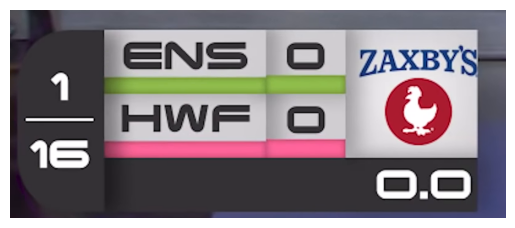

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load and crop the image
image_path = '/content/output_0026.png'
image = Image.open(image_path)
roi = (190, 1650, 1000, 1990)  # Define your ROI
cropped_image = image.crop(roi)
cropped_image.save("/content/template.png")

# Display the image using Matplotlib
plt.imshow(cropped_image)
plt.axis('off')  # Turn off axis numbering
plt.show()


In [ ]:
# Load the picture (with and without the scoreboard)
picture_path = '/content/without_scoreboard.png' # can replace it with '/content/with_scoreboard.png'
picture = Image.open(picture_path)
# Load the template and the mask
template_path = '/content/template.png'
template = Image.open(template_path)
mask_path = '/content/mask-scoreboard.png'
mask = Image.open(mask_path)
# Create a filter from the template and the mask
mask_array = np.array(mask).astype(np.float32)[:,:,:3] / 255
template_array = np.array(template).astype(np.float32)
template_array = template_array / 127.5 - 1
filtered_template = template_array * mask_array

# Crop the scoreboard region from the initial frame
roi_frame = (190, 1650, 1000, 1990)
cropped_picture = picture.crop(roi_frame)
cropped_array = np.array(cropped_picture).astype(np.float32) / 255

# Calculate the dot product
dot_product_result = np.sum(filtered_template * cropped_array)
print("Dot product result:", dot_product_result)

Dot product result: -5971.2266
